<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/agrismartsystem/blob/main/DeepLearning/comparaarimalstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing bibliotecas
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [2]:
!pip install -q kaggle


In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"saulohenriaguiares","key":"d924e4a0e94ae4b6df6896a6dffc71a9"}'}

In [4]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! cp kaggle.json ~/.kaggle/


In [6]:
! chmod 600 ~/.kaggle/kaggle.json


In [7]:
! kaggle datasets download -d mohitsingh1804/crop-recommendation


crop-recommendation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
! unzip crop-recommendation.zip


Archive:  crop-recommendation.zip
replace Crop_recommendation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Crop_recommendation.csv  


In [9]:
df = pd.read_csv("Crop_recommendation.csv", delimiter=",")


In [10]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
df['time'] = pd.date_range('11/5/2015', periods = 2200, freq ='1H')


In [12]:
df


,N,P,K,temperature,humidity,ph,rainfall,label,time
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2015-11-05 00:00:00
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,2015-11-05 01:00:00
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,2015-11-05 02:00:00
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2015-11-05 03:00:00
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,2015-11-05 04:00:00
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,2016-02-04 11:00:00
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,2016-02-04 12:00:00
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,2016-02-04 13:00:00
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,2016-02-04 14:00:00


In [13]:
df['DATE'] = df['time'].dt.date


In [14]:
df


,N,P,K,temperature,humidity,ph,rainfall,label,time,DATE
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2015-11-05 00:00:00,2015-11-05
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,2015-11-05 01:00:00,2015-11-05
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,2015-11-05 02:00:00,2015-11-05
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2015-11-05 03:00:00,2015-11-05
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,2015-11-05 04:00:00,2015-11-05
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,2016-02-04 11:00:00,2016-02-04
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,2016-02-04 12:00:00,2016-02-04
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,2016-02-04 13:00:00,2016-02-04
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,2016-02-04 14:00:00,2016-02-04


In [15]:
## features 

features_3 = ['temperature', 'humidity', 'ph']

features = df[features_3]
features.index = df['time']
features.head()

,temperature,humidity,ph
time,,,
2015-11-05 00:00:00,20.879744,82.002744,6.502985
2015-11-05 01:00:00,21.770462,80.319644,7.038096
2015-11-05 02:00:00,23.004459,82.320763,7.840207
2015-11-05 03:00:00,26.491096,80.158363,6.980401
2015-11-05 04:00:00,20.130175,81.604873,7.628473


In [16]:
!pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Previsão de Série Temporal com Arima

In [18]:
#Importing the libraries
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pmdarima import auto_arima 
import warnings 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [19]:
# Ignore harmless warnings 
warnings.filterwarnings("ignore") 

In [ ]:
# Fit auto_arima function to Stock Market Data
#stepwise_fit = auto_arima(data2['Close'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)  

In [21]:
# Split data into train / test sets 
train = features.iloc[:len(features)-150] 
test = features.iloc[len(features)-150:]

In [23]:
# Fit a SARIMAX
model = SARIMAX(features['temperature'],  order = (0, 1, 1),  seasonal_order =(2, 1, 1, 12))

In [24]:
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        temperature   No. Observations:                 2200
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -6069.616
Date:                            Mon, 28 Nov 2022   AIC                          12149.231
Time:                                    01:54:50   BIC                          12177.682
Sample:                                11-05-2015   HQIC                         12159.631
                                     - 02-04-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8765      0.006   -142.850      0.000      -0.889      -0.864
ar.S.L12      -0.0758      0.013     -5.984      0.000      -0.101      -0.051
ar.S.L24      -0.0670      0.013     -5.129      0.000      -0.093      -0.041
ma.S.L12      -0.9999      1.044     -0.958      0.338      -3.045       1.045
sigma2        14.6108     15.187      0.962      0.336     -15.155      44.376
===================================================================================
Ljung-Box (L1) (Q):                   7.80   Jarque-Bera (JB):              1782.65
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.68   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
start = len(train) 
end = len(train) + len(test) - 1

In [26]:
# Predictions for one-year against the test set 
predictions = result.predict(start, end, typ = 'levels').rename("Predictions") 

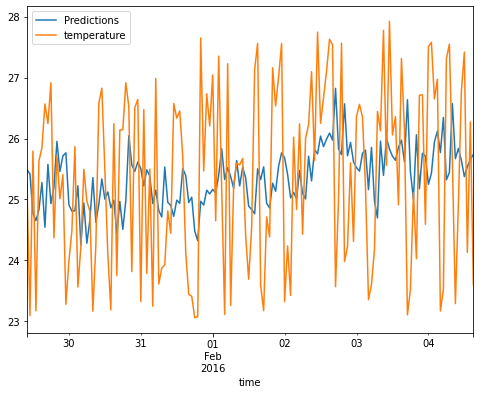

In [27]:
# plot predictions and actual values 
predictions.plot(legend = True) 
test['temperature'].plot(legend = True)

## Previsão de Série Temporal com LSTM

In [28]:
#############LSTM########################
train_set = features.iloc[0:1333:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1333):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [29]:
#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [30]:
#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)


Epoch 1/15
40/40 [==============================] - 11s 16ms/step - loss: 0.0614
Epoch 2/15
40/40 [==============================] - 1s 14ms/step - loss: 0.0183
Epoch 3/15
40/40 [==============================] - 1s 14ms/step - loss: 0.0168
Epoch 4/15
40/40 [==============================] - 1s 14ms/step - loss: 0.0154
Epoch 5/15
40/40 [==============================] - 1s 14ms/step - loss: 0.0154
Epoch 6/15
40/40 [==============================] - 1s 13ms/step - loss: 0.0150
Epoch 7/15
40/40 [==============================] - 1s 14ms/step - loss: 0.0146
Epoch 8/15
40/40 [==============================] - 1s 14ms/step - loss: 0.0138
Epoch 9/15
40/40 [==============================] - 1s 14ms/step - loss: 0.0132
Epoch 10/15
40/40 [==============================] - 1s 14ms/step - loss: 0.0124
Epoch 11/15
40/40 [==============================] - 1s 16ms/step - loss: 0.0117
Epoch 12/15
40/40 [==============================] - 1s 18ms/step - loss: 0.0129
Epoch 13/15
40/40 [=================

In [51]:
#Fetching the test data and preprocessing
#testdataframe = gh(symbol='SBIN',start=dt.datetime(2018,5,23),end=dt.datetime(2018,12,31))
#testdataframe['Date'] = testdataframe.index
testdataframe=features
testdata = pd.DataFrame(columns = ['time', 'temperature', 'humidity', 'ph'])
#testdata['time'] = testdataframe['time']
testdata['temperature'] = testdataframe['temperature']
testdata['humidity'] = testdataframe['humidity']
testdata['ph'] = testdataframe['ph']

real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((features['temperature'], testdata['temperature']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 2260):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

69/69 [==============================] - 0s 7ms/step


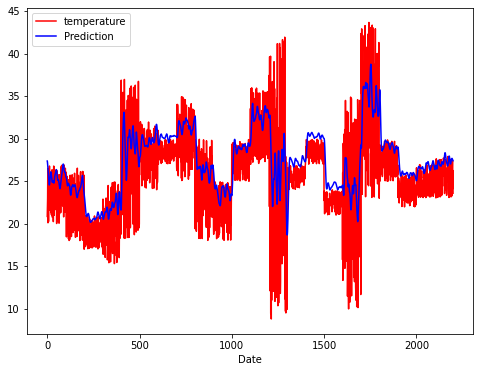

In [52]:





#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


#Visualizing the prediction
plt.figure()
plt.plot(real_stock_price, color = 'r', label = 'temperature')
plt.plot(predicted_stock_price, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()


In [54]:
######RMSE#######
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

# RMSE for ARIMA model
err_ARIMA = rmse(test["temperature"], predictions) 
print('RMSE with ARIMA', err_ARIMA)


#RMSE for LSTM Model
err_LSTM = rmse(test["temperature"], predicted_stock_price)
print('RMSE with LSTM', err_LSTM)

RMSE with ARIMA 1.46283608927979
RMSE with LSTM [4.15944146 5.58183759 3.92461731 5.52163405 3.99190357 3.90283669
 3.68393956 3.76673263 3.62480564 4.67973829 3.95500859 4.2975622
 4.09416301 5.44106681 4.93367257 4.60649652 3.89578902 5.23165794
 4.77369484 4.05378784 4.31946398 4.41326915 5.52609918 4.75634122
 3.68053037 3.63706794 4.05246048 4.85754965 5.51053995 3.76728099
 5.09782208 3.79973796 3.79747128 3.6246468  3.69377781 5.05205407
 3.69719711 3.66909208 5.40797958 3.70494097 5.071921   4.05123173
 5.46478234 3.61674793 5.19519736 5.01076709 4.97329991 4.40854472
 4.63040952 3.68253175 3.74143108 3.71042417 3.95950503 4.83771837
 5.31992104 5.34306297 5.60901248 5.5941135  3.60836955 4.06604437
 3.65144709 3.77794292 3.61127959 4.50505798 3.59701318 4.20885982
 5.5670232  3.59954429 5.45431486 4.17965676 4.00799877 4.02037001
 3.97425593 4.65581146 5.13911692 4.57602336 3.60446215 3.60241579
 5.21089839 5.51927441 4.46744632 4.66976003 3.60273613 3.6910371
 3.61410232 3.60